In [261]:
import sys
sys.path.append("../")
import torch
from CFIL_for_NIP.memory import ApproachMemory

In [262]:
memory_size=5e4
device = "cuda" if torch.cuda.is_available() else "cpu"  
approach_memory = ApproachMemory(memory_size, device)

In [263]:
joblib_path = "../CFIL_for_NIP/train_data/20250127_almi/persam_f.joblib"
approach_memory.load_joblib(joblib_path)

In [264]:
batch_size = 32
sample = approach_memory.sample(batch_size)
imgs = sample['images_seq']
positions_eb = sample['positions_seq']

In [265]:
print(positions_eb[0])

tensor([ 1.4408e+01,  4.6825e+00, -9.1596e-02,  3.5173e-03, -1.0767e-02,
        -8.5510e-01], device='cuda:0')


In [266]:
from torchvision import transforms as transforms
RandomAutocontrast = transforms.RandomAutocontrast(p=1.0)
RandomAdjustSharpness = transforms.RandomAdjustSharpness(sharpness_factor=5, p=0.5)
RandomInvert = transforms.RandomInvert(p=1.0)
ColorJitter = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)

In [267]:
# imgs = RandomAdjustSharpness(imgs)
# imgs = RandomAutocontrast(imgs)
imgs = RandomInvert(imgs)
imgs = ColorJitter(imgs)

In [268]:
img = imgs[0].cpu().numpy().transpose(1,2,0)
img.shape

(256, 256, 3)

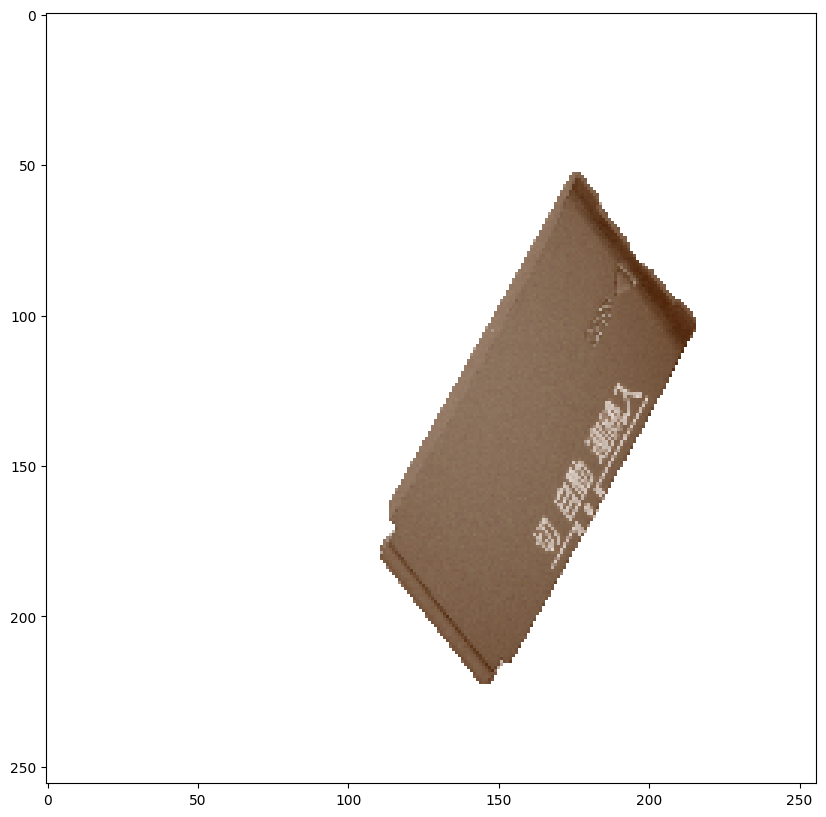

In [269]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()  
